In [59]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 1. tensorflow v2.xx에서 v1사용하기

In [60]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # v2를 비활성화하고 v1활성화
import numpy as np
import pandas as pd

## Tensorflow
- 데이터 흐름 그래프(tensor객체의 흐름)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인

In [61]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [62]:
# 간단한 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [63]:
# 타입 변경
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [64]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [65]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([2]) # 평균0, 표준편차가 1인 난수 실수 2개(정규분포이루는난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a,b])

[array([-0.3290114,  0.2904123], dtype=float32),
 array([-1.6955086], dtype=float32)]

In [66]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # w변수의 난수 초기화
sess.run(w)

array([-0.6288828], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression을 구현
## 2.1 입력(독립)변수 x가 1개, 타겟(종속)변수 y가 1개

In [67]:
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight오 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 예측값
H = W*x + b
#cost function(손실함수 = mse;최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W, b를 찾아내는 것
cost는 2차함수이므로 곡선그래프. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
=> GradientDescentOptimizer
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()
# W, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 5000번 학습 (v2에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:8.98308277130127, W:[0.18979076], b:[0.03766257]
200번째 cost:0.014186779968440533, W:[1.1380044], b:[0.68628377]
400번째 cost:0.005417214706540108, W:[1.0852784], b:[0.8061422]
600번째 cost:0.0020685556810349226, W:[1.0526968], b:[0.8802078]
800번째 cost:0.0007898799958638847, W:[1.0325636], b:[0.9259756]
1000번째 cost:0.0003016129194293171, W:[1.020122], b:[0.9542573]
1200번째 cost:0.00011516972881508991, W:[1.0124342], b:[0.9717341]
1400번째 cost:4.397685916046612e-05, W:[1.0076836], b:[0.98253345]
1600번째 cost:1.6793237591627985e-05, W:[1.0047481], b:[0.9892065]
1800번째 cost:6.412305538106011e-06, W:[1.0029341], b:[0.9933304]
2000번째 cost:2.4492157990607666e-06, W:[1.0018133], b:[0.99587804]
2200번째 cost:9.357913199892209e-07, W:[1.0011208], b:[0.9974522]
2400번째 cost:3.577985410174733e-07, W:[1.0006933], b:[0.9984246]
2600번째 cost:1.3696512723981868e-07, W:[1.0004288], b:[0.9990252]
2800번째 cost:5.250825907410217e-08, W:[1.0002656], b:[0.99939656]
3000번째 cost:2.0181053272949612e-08, W:[1.0001

In [68]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W, b])

[array([1.0000087], dtype=float32), array([0.9999811], dtype=float32)]

In [69]:
W_, b_ = sess.run([W, b])
W_[0], b_[0]

(1.0000087, 0.9999811)

In [70]:
def predict(x):
    return W_[0]*x + b_[0]

In [74]:
input_x = int(input('입력값은 ?'))
print('예측값은 ', predict(input_x))

입력값은 ?11
예측값은  12.000076830387115


## 2.2 predict를 위한 placeholder이용
- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [ ]:
# x = np.array([1,2,3])
x = tf.placeholder(tf.float16)
H = 1*x + 1
sess = tf.Session()
sess.run(H, feed_dict={x:5})
sess.run(H, feed_dict={x:np.array([1,2,3])})

In [72]:
# H = 2x+1
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:29.689708709716797, W:[1.1804316], b:[1.7110053]
200째 : cost:0.020761195570230484, W:[1.9509993], b:[1.2619079]
400째 : cost:0.0020420446526259184, W:[1.9846323], b:[1.0821401]
600째 : cost:0.00020084320567548275, W:[1.9951805], b:[1.0257603]
800째 : cost:1.9751436411752366e-05, W:[1.9984887], b:[1.0080783]
1000째 : cost:1.9435785816313e-06, W:[1.9995259], b:[1.0025339]
1200째 : cost:1.9126005668113066e-07, W:[1.9998512], b:[1.000795]
1400째 : cost:1.8835681458995168e-08, W:[1.9999533], b:[1.0002497]
1600째 : cost:1.887065170791402e-09, W:[1.9999852], b:[1.000079]
1800째 : cost:2.0263542233056597e-10, W:[1.9999951], b:[1.0000259]
2000째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2200째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2400째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2600째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2800째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
3000째 : cost:3.470859016863059e-11, W:[1

In [73]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.], dtype=float32)

In [28]:
sess.run(H, feed_dict={x:np.array([5, 6, 7])})

array([11.      , 12.999998, 14.999996], dtype=float32)

## 2.3 scale이 다른 데이터의 linear regression 구현(scale조정X)

In [32]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 3000번 학습
for step in range(3001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:4540.4052734375, W:[7.671006], b:[1.4549785]
200째 : cost:83.75760650634766, W:[10.174782], b:[-0.4268483]
400째 : cost:83.50755310058594, W:[10.263969], b:[-1.0872194]
600째 : cost:83.48463439941406, W:[10.290983], b:[-1.287241]
800째 : cost:83.48251342773438, W:[10.299166], b:[-1.347826]
1000째 : cost:83.48233032226562, W:[10.301644], b:[-1.366176]
1200째 : cost:83.48231506347656, W:[10.302395], b:[-1.371734]
1400째 : cost:83.48231506347656, W:[10.302623], b:[-1.3734183]
1600째 : cost:83.48231506347656, W:[10.302691], b:[-1.3739275]
1800째 : cost:83.4823226928711, W:[10.3027115], b:[-1.3740809]
2000째 : cost:83.4823226928711, W:[10.302717], b:[-1.3741258]
2200째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2400째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2600째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2800째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
3000째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]


In [ ]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터의 linear regression을 구현(조정O)
### scale을 맞추기 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화) : 0~1로 조정
                      X - Xmin
    normalization = ────────────
                     Xmax - Xmin
         * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler이용)
- standardization(표준화) : 평균0, 표준편차 1로 조정
                        X - Xmean(평균)
    standardization = ──────────────────
                          Xstd(표준편차)
         * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.StandardScaler 이용)

In [78]:
# 라이브러리를 쓰지 않고 정규화
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
scaled_x_data = (x_data - x_data.min()) / (x_data.max()-x_data.min())
scaled_y_data = (y_data - y_data.min()) / (y_data.max()-y_data.min())
print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.13043478 0.70652174 0.83695652 1.        ]


In [87]:
# 라이브러리를 쓰고 정규화 (MinMaxScalr이용)
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 정규화 시킬 객체
# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler() # y_data를 정규화 시킬 객체
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])

array([[ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 2.        , 15.        ,  0.11111111,  0.13043478],
       [ 5.        , 68.        ,  0.44444444,  0.70652174],
       [ 8.        , 80.        ,  0.77777778,  0.83695652],
       [10.        , 95.        ,  1.        ,  1.        ]])

In [92]:
# 라이브러리를 쓰고 정규화 (MinMaxScalr이용)
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 정규화 시킬 객체
# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler() # y_data를 정규화 시킬 객체
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])
##### 스케일 된 데이터 ####

# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 3000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:0.3141205906867981, W:[0.85007995], b:[0.6850925]
600째 : cost:0.04025352746248245, W:[0.7273465], b:[0.33278343]
1200째 : cost:0.0228542722761631, W:[0.73188925], b:[0.23709002]
1800째 : cost:0.019186247140169144, W:[0.7607244], b:[0.20099401]
2400째 : cost:0.016887402161955833, W:[0.7913638], b:[0.18014403]
3000째 : cost:0.015173007734119892, W:[0.8192502], b:[0.16437086]
3600째 : cost:0.01387791894376278, W:[0.84377736], b:[0.15118252]
4200째 : cost:0.012898762710392475, W:[0.86516684], b:[0.13983262]
4800째 : cost:0.0121584078297019, W:[0.8837801], b:[0.12998962]
5400째 : cost:0.011598629876971245, W:[0.8999681], b:[0.12143674]
6000째 : cost:0.011175374500453472, W:[0.9140451], b:[0.1140009]
6600째 : cost:0.01085534319281578, W:[0.92628586], b:[0.10753535]
7200째 : cost:0.010613372549414635, W:[0.93692964], b:[0.10191339]
7800째 : cost:0.010430416092276573, W:[0.94618475], b:[0.09702488]
8400째 : cost:0.010292083956301212, W:[0.95423263], b:[0.09277413]
9000째 : cost:0.01018748339265585

In [99]:
# 예측 : 모델에 scale 조정된 값으로 예측 => scale 조정된 y값
scaled_input = scaler_x.transform(np.array([[2],
                                           [3]]))
print('모델 예측을 위한 입력:', scaled_input, sep='\n')
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('모델 예측 결과 :', scaled_output)
print('결과 :', scaler_y.inverse_transform(scaled_output), sep='\n')

모델 예측을 위한 입력:
[[0.11111111]
 [0.22222222]]
모델 예측 결과 : [[0.18609816]
 [0.29550785]]
결과 :
[[20.12103 ]
 [30.186722]]


In [104]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

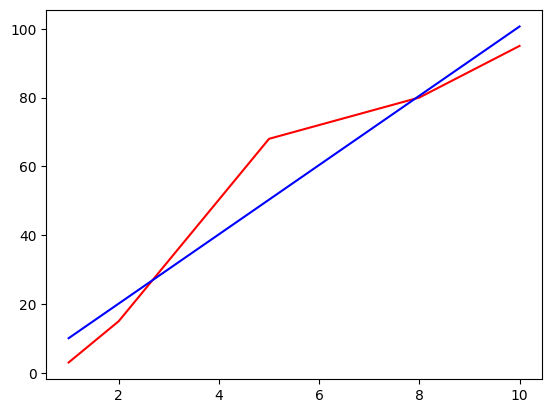

In [105]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

In [113]:
# 리이브러리를 쓰고 표준화 (StandardScaler 이용)
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([3,15,68,80,95]).reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data를 표준화할 객체
scaler_y = StandardScaler() # y_data를 표준화할 객체
scaled_x_data =scaler_x.fit_transform(x_data)
scaled_y_data =scaler_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))

[[ 1  3]
 [ 2 15]
 [ 5 68]
 [ 8 80]
 [10 95]]
[[-1.22474487 -1.34819316]
 [-0.93313895 -1.01936556]
 [-0.05832118  0.43295634]
 [ 0.81649658  0.76178394]
 [ 1.39970842  1.17281844]]


In [114]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 3000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:3.9352638721466064, W:[-0.18231012], b:[1.5917114]
600째 : cost:0.4131545424461365, W:[0.62205416], b:[0.47883832]
1200째 : cost:0.09440324455499649, W:[0.8640328], b:[0.14405005]
1800째 : cost:0.0655561238527298, W:[0.9368283], b:[0.04333488]
2400째 : cost:0.06294548511505127, W:[0.95872724], b:[0.01303655]
3000째 : cost:0.06270921975374222, W:[0.9653153], b:[0.00392183]
3600째 : cost:0.06268782913684845, W:[0.9672972], b:[0.00117982]
4200째 : cost:0.06268587708473206, W:[0.9678934], b:[0.00035494]
4800째 : cost:0.06268572807312012, W:[0.96807283], b:[0.00010679]
5400째 : cost:0.06268569082021713, W:[0.9681253], b:[3.2133248e-05]
6000째 : cost:0.06268568336963654, W:[0.96813506], b:[9.683688e-06]
6600째 : cost:0.06268569082021713, W:[0.96813506], b:[2.932144e-06]
7200째 : cost:0.06268570572137833, W:[0.96813506], b:[9.0067124e-07]
7800째 : cost:0.06268569082021713, W:[0.96813506], b:[2.8960488e-07]
8400째 : cost:0.06268569082021713, W:[0.96813506], b:[1.0865212e-07]
9000째 : cost:0.0626856

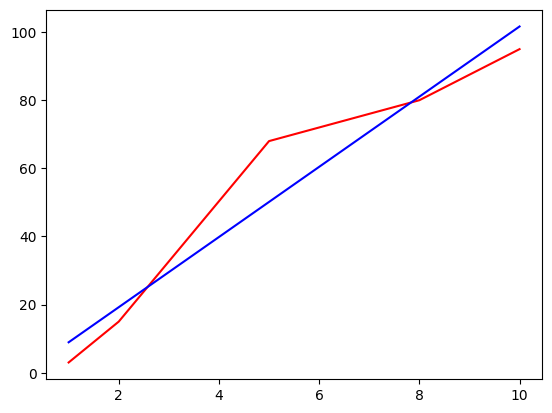

In [115]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')